In [14]:
# https://github.com/eliorc/Medium/blob/master/Nod2Vec-FIFA17-Example.ipynb

In [35]:

import warnings
#from text_unidecode import unidecode
from collections import deque



import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec

sns.set_style('whitegrid')

In [15]:
import pandas as pd
import numpy as np
from node2vec import Node2Vec

In [16]:

source_target_df = pd.read_csv("source_target_df.csv")
source_target_df

,Source,Target
0,OMC,Communication Services
1,OMC,Advertising
2,OMC,Service
3,IPG,Communication Services
4,IPG,Advertising
5,IPG,Service
6,HHS,Communication Services
7,HHS,Advertising
8,HHS,Service
9,CTL,Communication Services


<function matplotlib.pyplot.show(*args, **kw)>

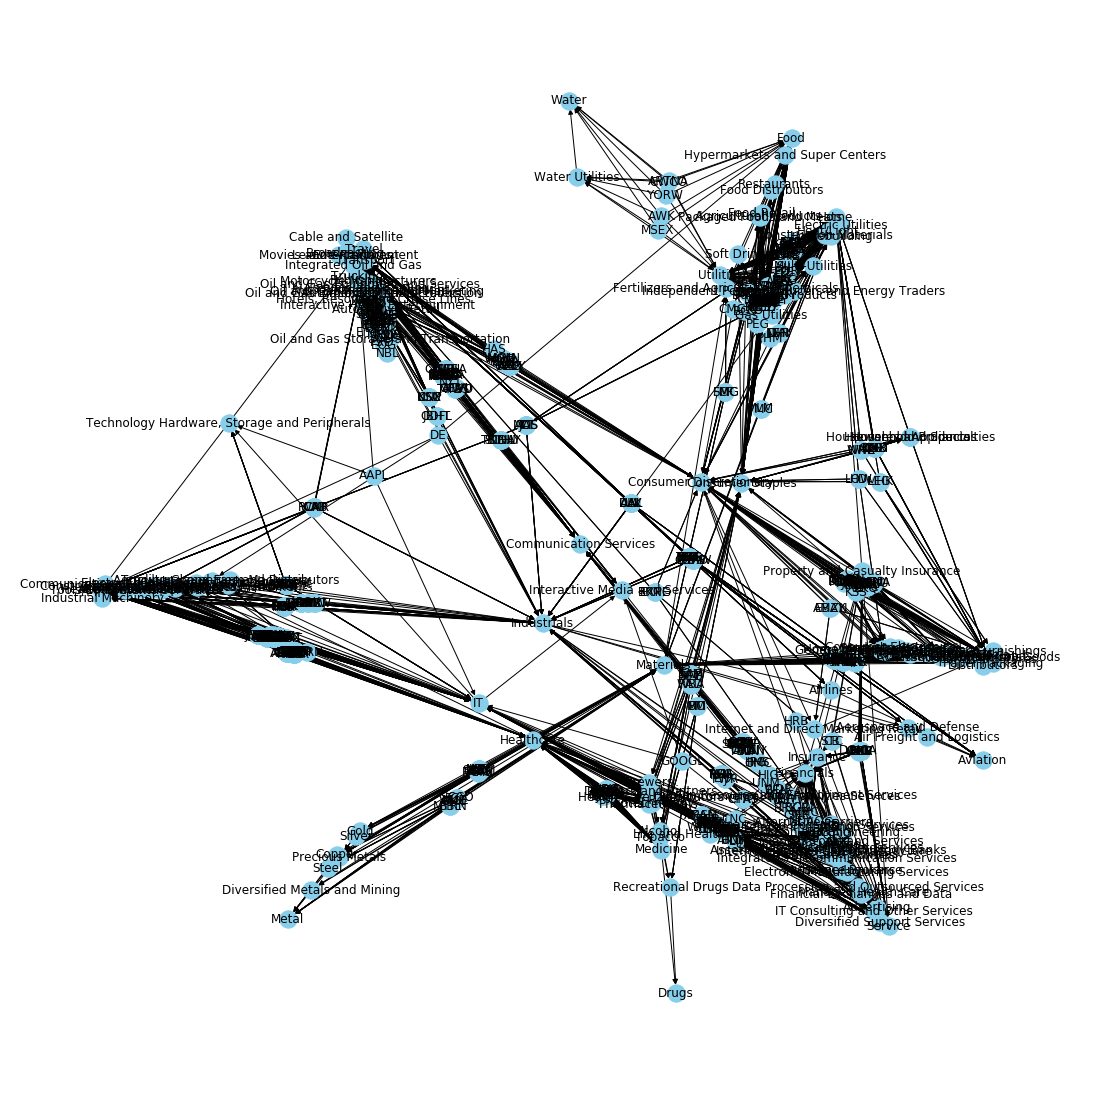

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

kg_df = pd.DataFrame({'source': source_target_df['Source'], 'target': source_target_df['Target'], 
                      'edge': source_target_df['Target']})
G = nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr = True, create_using = nx.MultiDiGraph())
plt.figure(figsize = (15,15))
pos = nx.spring_layout(G)
nx.draw(G, with_labels = True, node_color = 'skyblue', edge_cmap = plt.cm.Blues, pos = pos)
plt.show

In [43]:
node_list = []
for node in G.nodes:
    print(node)
    node_list.append(node)

OMC
Communication Services
Advertising
Service
IPG
HHS
CTL
Alternative Carriers
LBTYA
CCOI
DISCA
Broadcasting
Entertainment
VIAC
GTN
NXST
TGNA
SSP
CMCSA
Cable and Satellite
DISH
SJR
SIRI
T
Integrated Telecommunication Services
VZ
KT
TELNY
ATNI
TU
ORAN
ATVI
Interactive Home Entertainment
EA
TTWO
GLUU
NTES
SINA
Interactive Media and Services
BIDU
TCEHY
SOHU
DIS
Movies and Entertainment
LYV
NFLX
CNK
WWE
NYT
Publishing
MBT
Wireless Telecommunication Services
AMX
TDS
USM
VOD
SKM
SFTBF
GPS
Consumer Discretionary
Apparel Retail
Material Goods
LB
ROST
TJX
HBI
Apparel, Accessories and Luxury Goods
PVH
RL
TPR
UAA
VFC
BWA
Auto Parts and Equipment
Transport
F
Automobile Manufacturers
AAP
Automotive Retail
KMX
ORLY
AZO
MGM
Casinos and Gaming
WYNN
GRMN
Consumer Electronics
KSS
Department Stores
JWN
GPC
Distributors
LKQ
NKE
Footwear
DLTR
General Merchandise Stores
TGT
LEG
Home Furnishings
Home
MHK
HD
Home Improvement Retail
LOW
DHI
Homebuilding
LEN
NVR
PHM
CCL
Hotels, Resorts and Cruise Lines
MAR
RCL

In [18]:
node2vec = Node2Vec(G, dimensions=20, walk_length=16, num_walks=200, workers=2)

Computing transition probabilities: 100%|██████████████████████████████████████████| 643/643 [00:00<00:00, 7307.19it/s]


In [19]:
model = node2vec.fit(window=10, min_count=1)

In [30]:
for node, _ in model.most_similar('Insurance'):
    if len(node) > 5:
        print(node)

Financials
Insurance Brokers
Multi-Sector Holdings
Industrials
Multi-line Insurance
Wireless Telecommunication Services
Asset Management and Custody Banks
Advertising
Human Resource and Employment Services


C:\Users\conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


# Visualisation

In [32]:
nodes = [x for x in model.wv.vocab]
embeddings = np.array([model.wv[x] for x in nodes])

In [36]:
tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

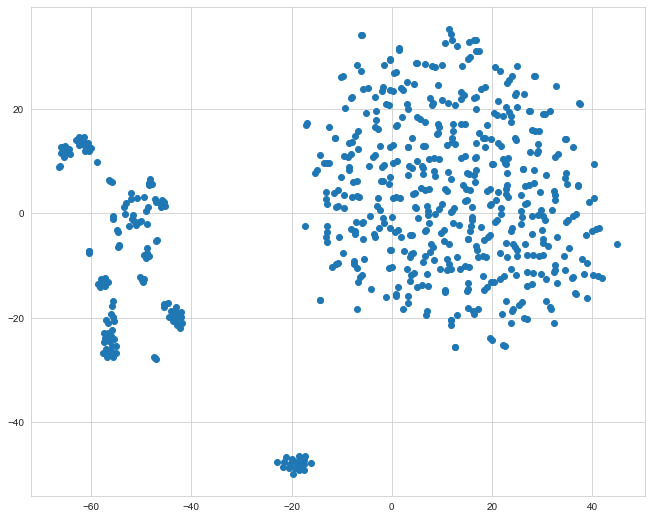

In [38]:
figure = plt.figure(figsize=(11, 9))

ax = figure.add_subplot(111)

ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
